# Tutorial: Advective-Diffusive Heat Transport in Frcatured Rock (Lauwerier 1955)

## Problem description

In [1]:
from IPython.display import Image, display, HTML

# Create the HTML structure for side-by-side layout
side_by_side = """
<div style="display: flex;">
    <div style="flex: 50%; padding: 10px;">
        <img src="./lauwerier-problem.png" style="width:100%; border: 1px solid #ddd; border-radius: 5px;">
    </div>
    <div style="flex: 50%; padding: 10px; font-family: Arial;">
        <h3>Governing processes of the Lauwerier problem</h3>
        <p>The figure on the left shows a sketch of the model geometry and heat transport processes:</p>
        <ul>
            <li>heat advection in the rock fracture</li>
            <li>heat conduction in the rock matrix</li>
        </ul>
    </div>
</div>
"""

# Display the constructed layout
display(HTML(side_by_side))

## Governing equations

Heat transport equations of the fracture-matrix system:

\begin{eqnarray}
\frac{b}{2} \rho_w c_w \frac{\partial T_f}{\partial t} 
+ 
\frac{b}{2} \rho_w c_w v_w\frac{\partial T_f}{\partial x}
- 
\kappa_m \left( \frac{\partial T_m}{\partial y} \right)_{y=b_f/2}
&=&
0
\\
\kappa_m \frac{\partial^2 T_m}{\partial y^2} &=& \left( (1-\phi) \rho_r c_r + \phi \rho_w c_w \right) \frac{\partial T_m}{\partial t}
\end{eqnarray}

Analytical solution by Laplace transformation:

\begin{eqnarray}
T_m &=& T_1 + (T_0-T_1) \, \text{erfc} \left( \frac{\xi+\eta-1}{2\sqrt{\theta(\tau-\xi)}}\right) U(\tau-\xi)
\\
T_f &=& T_1 + (T_0-T_1) \, \text{erfc} \left( \frac{\xi}{2\sqrt{\theta(\tau-\xi)}}\right) U(\tau-\xi)
\end{eqnarray}

with

\begin{equation}
\xi = \frac{x \kappa_m}{(b_f/2)^2 \rho_w c_w v_w}
\quad , \quad
\eta = \frac{y}{b_f/2}
\quad , \quad
\tau = \frac{t \kappa_m}{(b_f/2)^2 \rho_W c_w}
\quad , \quad
\theta \frac{\rho_w c_w}{(1-\phi) \rho_r c_r + \phi \rho_w c_w}
\end{equation}

---
## Material and systems conditions
---
Workflow steps:
- [ ] Material properties
- [ ] System conditions

### Material properties

In [2]:
rho_eff = 1000
cp_eff = 2000
lambda_eff = 2.2
phi = 0.15  # Porosity
alpha = lambda_eff / (rho_eff * cp_eff)  # Thermal diffusivity
#
thermal_conductivity = 3.2
density = 2500
specific_heat_capacity = 1000
permeability = 1e-13

### System conditions

In [3]:
T0 = 300  # Initial temperature
T1 = 373  # Boundary condition left
max_time = 3153600000
n_steps = 100
delta_t = max_time / n_steps

---
## Numerical solution
---
Workflow steps:
- Pre-processing
    - [x] Meshing step: `GMSH`
    - [ ] Model set-up: `PRJ` - OGS project file
- Simulation
- Post-processing

### Meshing step

In [4]:
import gmsh
import sys

gmsh.initialize(sys.argv)
gmsh.model.add("my_model")
# ... Your geometry creation code here (add points, lines, surfaces) ...
# Example: A simple rectangle
lc1 = 1.0
lc2 = 2.5
p1 = gmsh.model.geo.addPoint(0, 0, 0, lc1)
p2 = gmsh.model.geo.addPoint(100, 0, 0, lc1)
p3 = gmsh.model.geo.addPoint(100, 25, 0, lc2)
p4 = gmsh.model.geo.addPoint(0, 25, 0, lc2)
l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p1)
curve_loop = gmsh.model.geo.addCurveLoop([l1, l2, l3, l4])
surface = gmsh.model.geo.addPlaneSurface([curve_loop])

domain_marker = 1
surfaces = gmsh.model.getEntities(dim=2)
gmsh.model.addPhysicalGroup(2, [curve_loop], domain_marker)
gmsh.model.setPhysicalName(2, domain_marker, "MyDomain")

# Set recombination option BEFORE generating the mesh
##gmsh.option.setNumber("Mesh.RecombineAll", 1) #quad mesh
# Synchronize before meshing
gmsh.model.geo.synchronize()
# Generate the 2D mesh
gmsh.model.mesh.generate(2)  # Argument '2' for 2D mesh
# Write the mesh to disk
gmsh.write("output_mesh.msh")
gmsh.write("output_mesh.vtk")
# Launch GUI to view (optional)
##gmsh.fltk.run()
gmsh.finalize()

In [5]:
import pyvista as pv

# Load your VTK file
mesh = pv.read('output_mesh.vtk')
mesh.save('lauwerier.vtu')

# Get mesh information
print(f"Number of points: {mesh.n_points}")
print(f"Number of cells: {mesh.n_cells}")
#print(f"Cell types: {mesh.cell_types}")
# See the names of all data arrays in your file
print("Available point data arrays:", mesh.point_data.keys())
print("Available cell data arrays:", mesh.cell_data.keys())

# Plot as wireframe
mesh.plot(show_edges=True, color='white', line_width=1)

Number of points: 1314
Number of cells: 2454
Available point data arrays: []
Available cell data arrays: ['CellEntityIds']


Widget(value='<iframe src="http://localhost:62937/index.html?ui=P_0x1433190e120_0&reconnect=auto" class="pyvis…

INFO: 127.0.0.1 [10/Jan/2026:13:02:38 +0100] "GET /index.html?ui=P_0x14332db6490_1&reconnect=auto HTTP/1.1" 200 237 "http://localhost:8888/" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/143.0.0.0 Safari/537.36 Edg/143.0.0.0"
INFO: 127.0.0.1 [10/Jan/2026:13:02:38 +0100] "GET /index.html?ui=P_0x1436120c2d0_2&reconnect=auto HTTP/1.1" 200 237 "http://localhost:8888/" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/143.0.0.0 Safari/537.36 Edg/143.0.0.0"
INFO: 127.0.0.1 [10/Jan/2026:13:02:38 +0100] "GET /index.html?ui=P_0x1433190e120_0&reconnect=auto HTTP/1.1" 200 237 "http://localhost:8888/" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/143.0.0.0 Safari/537.36 Edg/143.0.0.0"
INFO: 127.0.0.1 [10/Jan/2026:13:02:38 +0100] "GET /assets/index-e80c1ba5.css HTTP/1.1" 200 236 "http://localhost:62937/index.html?ui=P_0x14332db6490_1&reconnect=auto" "Mozilla/5.0 (Windows NT 1

### Model set-up

In [6]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import ogstools as ot
import pyvista as pv
from scipy.special import erfc

In [7]:
out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
out_dir.mkdir(parents=True, exist_ok=True)

### Simulation

In [8]:
model = ot.Project(input_file="lauwerier_HT.prj", output_file=f"{out_dir}/modified.prj")
model.replace_text(T0, xpath="./parameters/parameter[name='T0']/value")
model.replace_text(T1, xpath="./parameters/parameter[name='T1']/value")
model.replace_text(thermal_conductivity, xpath="./media/medium/properties/property[name='thermal_conductivity']/value")
model.replace_text(density, xpath="./media/medium/properties/property[name='density']/value")
model.replace_text(specific_heat_capacity, xpath="./media/medium/properties/property[name='specific_heat_capacity']/value")
model.replace_text(max_time, xpath="./time_loop/processes/process/time_stepping/t_end")
model.replace_text(permeability, xpath="./media/medium/properties/property[name='permeability']/value")
model.write_input()

In [9]:
# Run OGS
model.run_model(logfile=f"{out_dir}/out.txt", args=f"-o {out_dir} -m . -s .")

Project file written to output.
Simulation: _out\modified.prj
Status: finished successfully.
Execution took 7.895898818969727 s


Time 0.0: Mesh bounds = BoundsTuple(x_min=0.0, x_max=100.0, y_min=0.0, y_max=25.0, z_min=0.0, z_max=0.0)
  Found point 53 (distance not returned)
Time 315360000.0: Mesh bounds = BoundsTuple(x_min=0.0, x_max=100.0, y_min=0.0, y_max=25.0, z_min=0.0, z_max=0.0)
  Found point 53 (distance not returned)
Time 630720000.0: Mesh bounds = BoundsTuple(x_min=0.0, x_max=100.0, y_min=0.0, y_max=25.0, z_min=0.0, z_max=0.0)
  Found point 53 (distance not returned)
Time 946080000.0: Mesh bounds = BoundsTuple(x_min=0.0, x_max=100.0, y_min=0.0, y_max=25.0, z_min=0.0, z_max=0.0)
  Found point 53 (distance not returned)
Time 1261440000.0: Mesh bounds = BoundsTuple(x_min=0.0, x_max=100.0, y_min=0.0, y_max=25.0, z_min=0.0, z_max=0.0)
  Found point 53 (distance not returned)
Time 1576800000.0: Mesh bounds = BoundsTuple(x_min=0.0, x_max=100.0, y_min=0.0, y_max=25.0, z_min=0.0, z_max=0.0)
  Found point 53 (distance not returned)
Time 1892160000.0: Mesh bounds = BoundsTuple(x_min=0.0, x_max=100.0, y_min=0.0, y_

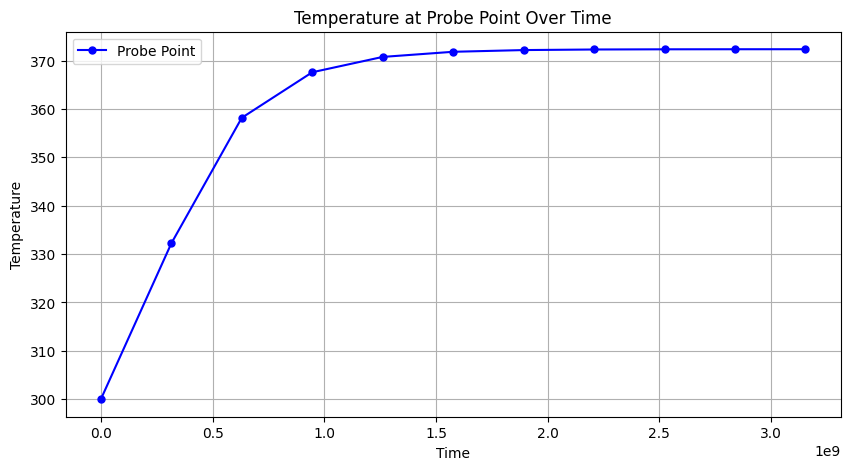

In [10]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a reader for the PVD file
reader = pv.get_reader("_out/lauwerier_HT.pvd")
##reader = pv.PVDReader("_out/lauwerier_T.pvd")
# Alternative for a simple list of VTU files:
# reader = pv.MultiBlock(["file_0000.vtu", "file_0001.vtu"])

# Define your probe point
probe_point = [50.0, 0.0, 0.0]

# Prepare lists to collect data
times = []
values = []

for i in range(len(reader.time_values)):
    reader.set_active_time_value(reader.time_values[i])
    mesh = reader.read()[0]  # Get the data for this timestep
    
    # 1. CRITICAL CHECK: Is the probe point within the mesh bounds?
    print(f"Time {reader.time_values[i]}: Mesh bounds = {mesh.bounds}")
    
    # 2. SAFE extraction of the closest point
    try:
        # find_closest_point returns either (distance, id) or just id
        result = mesh.find_closest_point(probe_point)
        
        if isinstance(result, tuple):
            # It returned the expected (distance, point_id) tuple
            distance, point_id = result
            print(f"  Found point {point_id} at distance {distance:.2e}")
        else:
            # It returned only a point_id (integer)
            point_id = result
            print(f"  Found point {point_id} (distance not returned)")
            
        # Now get your data value
        value = mesh.point_data['temperature'][point_id]  # Use your data array name
        values.append(value)
        times.append(reader.time_values[i])
        
    except Exception as e:
        print(f"  ERROR at time {reader.time_values[i]}: {e}")
        # Append NaN to keep list lengths consistent
        values.append(np.nan)
        times.append(reader.time_values[i])

# 3. Plot the results (NaN values will create gaps in the line)
plt.figure(figsize=(10, 5))
plt.plot(times, values, 'b-o', label='Probe Point', markersize=5)
plt.xlabel("Time")
plt.ylabel("Temperature")  # Change to your variable name
plt.title("Temperature at Probe Point Over Time")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
#ms = ot.MeshSeries(f"{out_dir}/result_ogata-banks_domain.xdmf")
ms = ot.MeshSeries(f"{out_dir}/lauwerier_HT.pvd")
var = ot.variables.temperature
#print(var)

def plot_results_errors(
    x: np.ndarray, y: np.ndarray, y_ref: np.ndarray, labels: list, x_label: str
):
    "Plot numerical results against analytical solution"
    #rel_errors = (np.asarray(y) - np.asarray(y_ref)) / np.asarray(y_ref)
    rel_errors = np.asarray(y)
    #assert np.all(np.abs(rel_errors) <= 0.0025)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=150)
    ax1.set_xlabel(x_label)
    ax2.set_xlabel(x_label)
    ax1.set_ylabel(var.get_label())
    ax2.set_ylabel("relative error")
    for i, rel_error in enumerate(rel_errors):
        ax1.plot(x, var.transform(y[i]), f"--C{i}", lw=2, label=labels[i])
        ax1.plot(x, var.transform(y_ref[i]), f"-C{i}", lw=1)
        ax2.plot(x, rel_error, f"-C{i}", lw=2)
    ax1.plot([], [], "--k", lw=2, label="numerical")
    ax1.plot([], [], "-k", lw=1, label="analytical")
    ax1.legend()
    fig.tight_layout()

## Temperature over time at different locations

100%|█████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 370.77it/s]


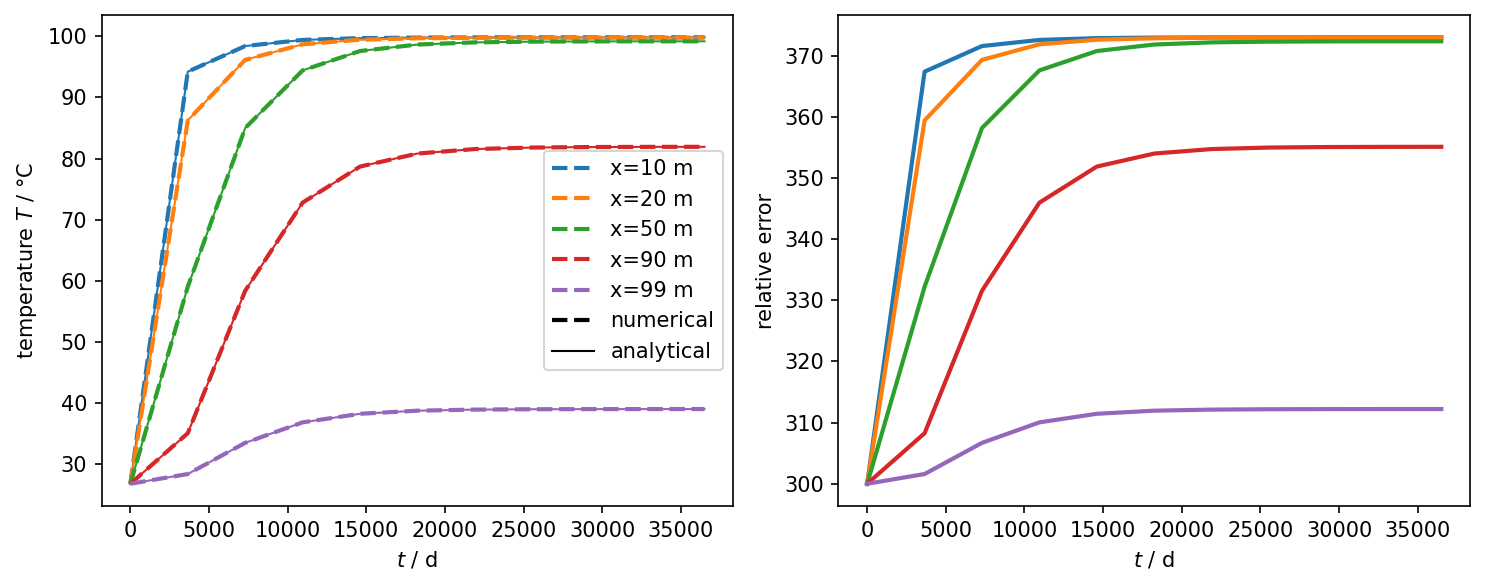

In [12]:
obs_pts = np.asarray([[x, 0, 0] for x in [10, 20, 50, 90, 99]])
num_values = ms.probe(obs_pts, "temperature").T
#ref_values = [ogata_banks_analytical(ms.timevalues, x) for x in obs_pts[:, 0]]
ref_values = ms.probe(obs_pts, "temperature").T
leg_labels = [f"x={pt[0]} m" for pt in obs_pts]
ms = ms.scale(time=("s", "days"))
time = ms.timevalues
plot_results_errors(time, num_values, num_values, leg_labels, "$t$ / d")

## Temperature over x at different timesteps

In [13]:
import pyvista as pv

# Load data
result = pv.read("_out/lauwerier_HT_t_3153600000.00.vtu")

# Create a plotter with a 2x2 grid of sub-windows
plotter = pv.Plotter(shape=(2, 2))

# Top-left: 3D surface plot of temperature
plotter.subplot(0, 0)
plotter.add_mesh(result, scalars='temperature', cmap='coolwarm', show_edges=False)
plotter.add_text("Temperature Field", font_size=10)

# Top-right: Slice through the domain

# Bottom-left: Isocontours of pressure
plotter.subplot(1, 0)
contours = result.contour(isosurfaces=5, scalars='temperature')
plotter.add_mesh(contours, color='white', line_width=3)
plotter.add_mesh(result, style='wireframe', color='black', opacity=0.1)
plotter.add_text("Temperature Contours", font_size=10)

plotter.show()

INFO: trigger(trigger__8)
INFO: trigger(trigger__9)
INFO: trigger(P_0x14332db6490_1Camera)
INFO: trigger(P_0x14332db6490_1AnimateStart)
INFO: trigger(P_0x14332db6490_1AnimateStop)
INFO: js_key = class
INFO: js_key = style
INFO: js_key = fluid
INFO: js_key = class
INFO: before: class = { 'rounded-circle': !P_0x14332db6490_1_show_ui }
INFO: (prefix=None) token {
INFO: has({ => {) = False
INFO: (prefix=None) token  
INFO: has(  =>  ) = False
INFO: (prefix=None) token '
INFO: has(' => ') = False
INFO: (prefix=None) token rounded
INFO: has(rounded => rounded) = False
INFO: (prefix=None) token -
INFO: has(- => -) = False
INFO: (prefix=None) token circle
INFO: has(circle => circle) = False
INFO: (prefix=None) token '
INFO: has(' => ') = False
INFO: (prefix=None) token :
INFO: has(: => :) = False
INFO: (prefix=None) token  
INFO: has(  =>  ) = False
INFO: (prefix=None) token !
INFO: has(! => !) = False
INFO: (prefix=None) token P_0x14332db6490_1_show_ui
INFO: has(P_0x14332db6490_1_show_ui => P

Widget(value='<iframe src="http://localhost:62937/index.html?ui=P_0x14332db6490_1&reconnect=auto" class="pyvis…

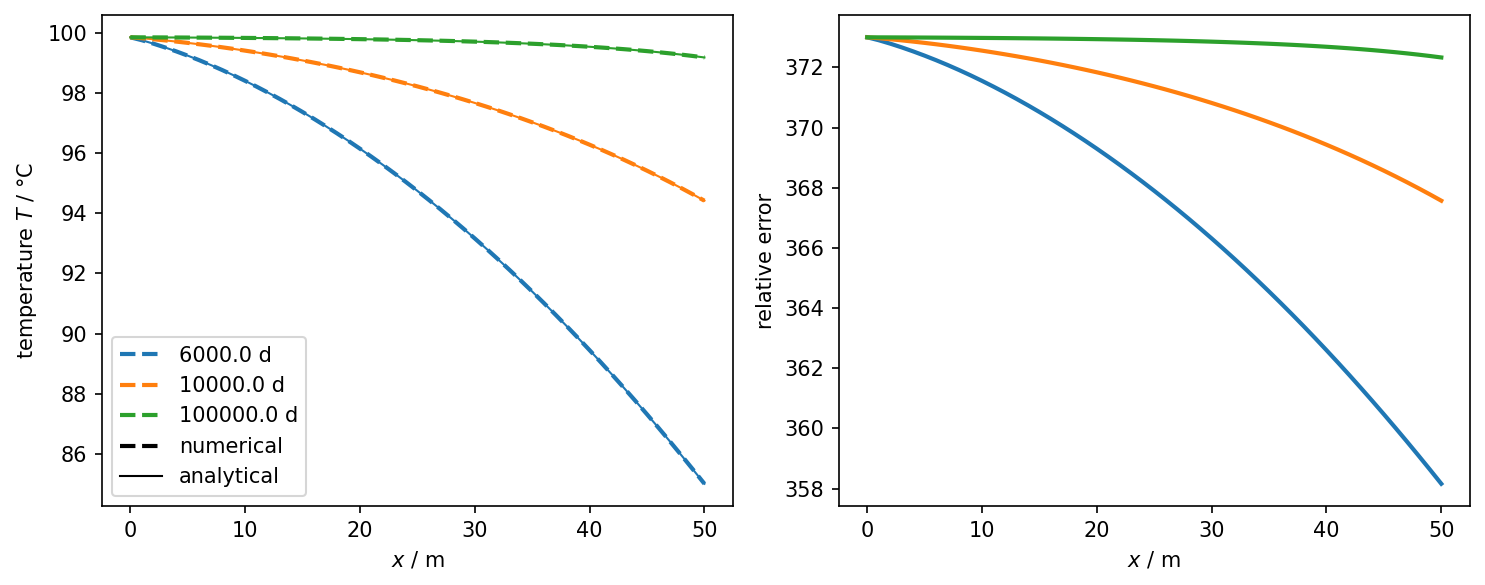

In [14]:
timevalues = np.asarray([6e3,1e4,1e5])
timesteps = [ms.closest_timestep(tv) for tv in timevalues]
all_pts = ms.mesh(0).points
pts = all_pts[(all_pts[:, 0] <= 50) & (all_pts[:, 1] == 0)]
line = pv.PointSet(pts)
num_values = [line.sample(ms.mesh(ts))["temperature"] for ts in timesteps]
#ref_values = [ogata_banks_analytical(tv * 86400, pts[:, 0]) for tv in timevalues]
ref_values = [line.sample(ms.mesh(ts))["temperature"] for ts in timesteps]
leg_labels = [f"{tv} d" for tv in timevalues]
plot_results_errors(pts[:, 0], num_values, ref_values, leg_labels, "$x$ / m")

## Temperature over time and space

C:\Users\okolditz\AppData\Local\Programs\Python\Python313\Lib\site-packages\ogstools\meshlib\mesh_series.py:924: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(x_vals, y_vals, values, cmap=cmap, norm=norm)


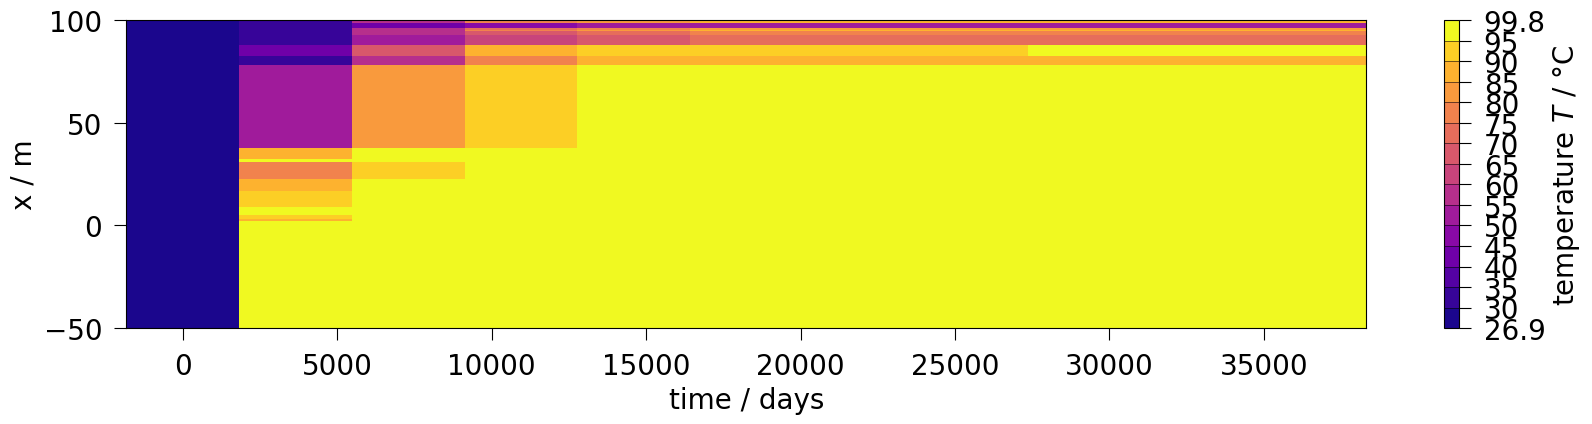

In [15]:
ot.plot.setup.time_unit = "days"
fig = ms.plot_time_slice("time", "x", var, figsize=(20, 4), fontsize=20)

In [16]:
import pyvista as pv

# 1. Read the VTK file
# PyVista automatically detects the format (.vtu, .vtk, .pvtu, etc.)
mesh = pv.read("_out/lauwerier_HT_t_3153600000.00.vtu")
# 2. Quickly inspect what data is in the file
print("Available Point Data:", mesh.point_data.keys())
print("Available Cell Data:", mesh.cell_data.keys())
# 3. Plot a specific data field (e.g., 'temperature')
# Replace 'temperature' with the name of your data array
mesh.plot(scalars='temperature', cmap='coolwarm', show_edges=True)
mesh.contour(isosurfaces=10, scalars='temperature').plot()

INFO: trigger(trigger__15)
INFO: trigger(trigger__16)
INFO: trigger(P_0x1436120c2d0_2Camera)
INFO: trigger(P_0x1436120c2d0_2AnimateStart)
INFO: trigger(P_0x1436120c2d0_2AnimateStop)
INFO: js_key = class
INFO: js_key = style
INFO: js_key = fluid
INFO: js_key = class
INFO: before: class = { 'rounded-circle': !P_0x1436120c2d0_2_show_ui }
INFO: (prefix=None) token {
INFO: has({ => {) = False
INFO: (prefix=None) token  
INFO: has(  =>  ) = False
INFO: (prefix=None) token '
INFO: has(' => ') = False
INFO: (prefix=None) token rounded
INFO: has(rounded => rounded) = False
INFO: (prefix=None) token -
INFO: has(- => -) = False
INFO: (prefix=None) token circle
INFO: has(circle => circle) = False
INFO: (prefix=None) token '
INFO: has(' => ') = False
INFO: (prefix=None) token :
INFO: has(: => :) = False
INFO: (prefix=None) token  
INFO: has(  =>  ) = False
INFO: (prefix=None) token !
INFO: has(! => !) = False
INFO: (prefix=None) token P_0x1436120c2d0_2_show_ui
INFO: has(P_0x1436120c2d0_2_show_ui =>

Available Point Data: ['pressure', 'temperature', 'velocity']
Available Cell Data: []


INFO: after: v-slot:activator = { props }
INFO: js_key = v-bind
INFO: before: v-bind = props
INFO: (prefix=None) token props
INFO: has(props => props) = False
INFO:  => props
INFO: after: v-bind = props
INFO: js_key = v-bind
INFO: before: v-bind = props
INFO: (prefix=None) token props
INFO: has(props => props) = False
INFO:  => props
INFO: after: v-bind = props
INFO: js_key = class
INFO: js_key = v-model
INFO: before: v-model = P_0x1436120c2d0_2_grid_visibility
INFO: (prefix=None) token P_0x1436120c2d0_2_grid_visibility
INFO: has(P_0x1436120c2d0_2_grid_visibility => P_0x1436120c2d0_2_grid_visibility) = True
INFO: (prefix=None) translated P_0x1436120c2d0_2_grid_visibility
INFO:  => P_0x1436120c2d0_2_grid_visibility
INFO: after: v-model = P_0x1436120c2d0_2_grid_visibility
INFO: js_key = density
INFO: js_key = hideDetails
INFO: js_key = falseIcon
INFO: js_key = trueIcon
INFO:  token Toggle ruler ({
INFO:  token { P_0x1436120c2d0_2_grid_visibility ? 'on' : 'off' }
INFO: (prefix=None) token

Widget(value='<iframe src="http://localhost:62937/index.html?ui=P_0x1436120c2d0_2&reconnect=auto" class="pyvis…

INFO: trigger(trigger__22)
INFO: trigger(trigger__23)
INFO: trigger(P_0x1436120d810_3Camera)
INFO: trigger(P_0x1436120d810_3AnimateStart)
INFO: trigger(P_0x1436120d810_3AnimateStop)
INFO: js_key = class
INFO: js_key = style
INFO: js_key = fluid
INFO: js_key = class
INFO: before: class = { 'rounded-circle': !P_0x1436120d810_3_show_ui }
INFO: (prefix=None) token {
INFO: has({ => {) = False
INFO: (prefix=None) token  
INFO: has(  =>  ) = False
INFO: (prefix=None) token '
INFO: has(' => ') = False
INFO: (prefix=None) token rounded
INFO: has(rounded => rounded) = False
INFO: (prefix=None) token -
INFO: has(- => -) = False
INFO: (prefix=None) token circle
INFO: has(circle => circle) = False
INFO: (prefix=None) token '
INFO: has(' => ') = False
INFO: (prefix=None) token :
INFO: has(: => :) = False
INFO: (prefix=None) token  
INFO: has(  =>  ) = False
INFO: (prefix=None) token !
INFO: has(! => !) = False
INFO: (prefix=None) token P_0x1436120d810_3_show_ui
INFO: has(P_0x1436120d810_3_show_ui =>

Widget(value='<iframe src="http://localhost:62937/index.html?ui=P_0x1436120d810_3&reconnect=auto" class="pyvis…

For this discretisation, the numerical solution approximates well to the analytical one. Finer resolutions in the time discretisation reduce the deviations considerably. In this benchmark it is easy to see that too coarse resolutions (especially in the time discretisation) yield very plausible results, which can, however, deviate considerably from the exact solution. An analysis of the von Neumann stability criterion is worthwhile here. This criterium demands

$$\text{Ne}=\frac{\alpha\Delta t}{\left(\Delta x\right)^2}\leq\frac{1}{2}$$

Evaluated for the problem at hand, the following value results:

In [17]:
dx = 0.17  # Spatial discretizations at the left boundary (smallest element)
Ne = alpha * delta_t / (dx * dx)  # von-Neumann-Stability-Criterion
print(Ne)

1200.3321799307955


The Neumann criterion is not met in this case. The smallest element is $\Delta x=0.17\text{m}$ in width. A suitable time step for this cell size would be

In [18]:
dt = 0.5 * (dx * dx) / alpha
print("Smallest timestep should not exceed", dt, "seconds.")

Smallest timestep should not exceed 13136.363636363638 seconds.


Repeating the test with this time step should give much smaller deviations to the exact solution.

However, the problem at hand has been spatially discretised where element widths are increasing from left to right. That means that the stability criteria is violated only at the left region of the domain.
The minimum width that an element should have is can be determined by:

In [19]:
dx = np.sqrt(2 * alpha * delta_t)
print("Minimum element size should be", dx, " metre.")

Minimum element size should be 8.329417746757573  metre.


The elements located at approximately $x>1\text{m}$ satisfy this criterion, therefore the solution presented here can be accepted as an approximation of the exact solution.

---
### Credits:
This notebook was compiled by OK using:
- Norbert's Ogata-Banks benchmark notebook: https://www.opengeosys.org/stable/docs/benchmarks/th2m/ogata-banks/
- coding support by DeepSeek
which is greatly acknowledged.